<a class="anchor" id="section-0"></a>
<img src="https://i.imgur.com/lTCPbz0.jpeg" alt='logo puc-sp' width='30%' align='left'>

### Pontifícia Universidade Católica de São Paulo (PUC-SP)

<h1 style=font-size:30px>Treinando Preditores Lineares e Logísticos</h1>


### Bacharelado em Ciência de Dados e Inteligência Artificial

#### Turma: CDIA21-MA

**Aluno:** Lucas Lopes Amorim

**Professor:** Jefferson de Oliveira Silva

**Dúvidas:**

Scaling muda a correlação?

A correlação de Pearson funciona para features binárias? Posso confiar?

Devo experimentar feature engineering com todas as variáveis ou só as que tem correlação alta?

Fit do scalling por coluna ou por dataset?

Regressão linear pode ser feita para prever variável não-contínua?

A maioria dos modelos lineares se beneficia da padronização dos dados. Por que frequentemente padronizar é melhor que normalizar?

#### Próximos Passos:
- [x] explorar os feature selectors do sklearn
- [ ] explorar mais os dados com dataviz
- [x] reduzir o número de classes do output
- [ ] regressão linear
- [ ] trazer nps para a análise exploratória
- [ ] reduzir código repetido

**Estrutura:**

1. [Análise Exploratória](#section-1)\
    1.1. [Classificando variáveis](#section-1-1)\
    1.2, Simplificando classes
2. [Predizendo a motivação dos alunos](#section-2)\
    2.1. Selecionando Features com o auxílio do scikit-learn\
    2.2. Regressão Logística multiclasse (1 feature)\
    2.3. Regressão Logística multiclasse (3 features)\
    2.4. Regressão Logística multiclasse simplificada
3. [Predizendo renda dos alunos](#section-3)\
    3.1. [Selecionando Features com o auxílio do scikit-learn](#section-3-1)\
    3.2. [Regressão Linear (1 feature)](#section-3-1)\
    3.3. [Regressão Linear multi-feature](#section-3-1)

# 1. Análise Exploratória <a class="anchor" id="section-1"></a>
[Voltar ao topo](#section-0)

In [549]:
import pandas as pd
import numpy as np
import random
from cdia.datasets import DatasetEstudantes
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
sns.set(font_scale=2)
pd.plotting.register_matplotlib_converters()

In [415]:
n_amostra = 10000

random.seed(42)
#  O método criar retorna um DataFrame (Pandas)
df = DatasetEstudantes.criar(n_amostra)

In [416]:
df.head()

,matrícula,nome,idade,renda,cor,sexo,ano_curso,escola,cod_curso,logradouro,numero,bairro,cidade,uf,cep,motivação
0,RA55000001,Maceane Arantes,19,172.0,1,2,3,1,24,Rua Emílio Barbosa,875,Vila Prudente,São Paulo,SP,03135-040,9
1,RA55000002,Ecilo Abranches,19,459.0,1,1,3,1,8,Rua Major Walter Carlson,532,Jardim Arpoador,São Paulo,SP,05565-210,9
2,RA55000003,Wellington Colaço Gomide,19,297.0,1,1,3,1,50,Rua Major Almeida Queiroz,127,Instituto de Previdência,São Paulo,SP,05531-020,10
3,RA55000004,Kazuhiko Frajuca Batata Galvão,19,158.0,1,1,3,1,7,Rua Capitão Prudente,202,Pinheiros,São Paulo,SP,05422-050,10
4,RA55000005,Teixeira Mirandela Caeira,19,393.0,1,1,3,1,48,Rua João Gomes,306,Jardim Herculano,São Paulo,SP,04920-040,9


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   matrícula   10000 non-null  object 
 1   nome        10000 non-null  object 
 2   idade       10000 non-null  int64  
 3   renda       10000 non-null  float64
 4   cor         10000 non-null  int64  
 5   sexo        10000 non-null  int64  
 6   ano_curso   10000 non-null  int64  
 7   escola      10000 non-null  int64  
 8   cod_curso   10000 non-null  int64  
 9   logradouro  10000 non-null  object 
 10  numero      10000 non-null  object 
 11  bairro      10000 non-null  object 
 12  cidade      10000 non-null  object 
 13  uf          10000 non-null  object 
 14  cep         10000 non-null  object 
 15  motivação   10000 non-null  int32  
dtypes: float64(1), int32(1), int64(6), object(8)
memory usage: 1.2+ MB


In [418]:
df.describe()

,idade,renda,cor,sexo,ano_curso,escola,cod_curso,motivação
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,21.462400,5357.528002,1.140000,1.500000,3.616800,1.496900,56.43970,5.945400
std,5.063354,42653.373802,0.347004,0.500025,0.967084,0.500015,32.45347,3.169357
min,19.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000
25%,19.000000,1185.740000,1.000000,1.000000,3.000000,1.000000,28.00000,3.000000
50%,20.000000,1865.430000,1.000000,1.500000,4.000000,1.000000,56.00000,6.000000
75%,21.000000,2851.947500,1.000000,2.000000,4.000000,2.000000,85.00000,9.000000
max,50.000000,988657.000000,2.000000,2.000000,5.000000,2.000000,112.00000,10.000000


<Figure size 432x288 with 0 Axes>

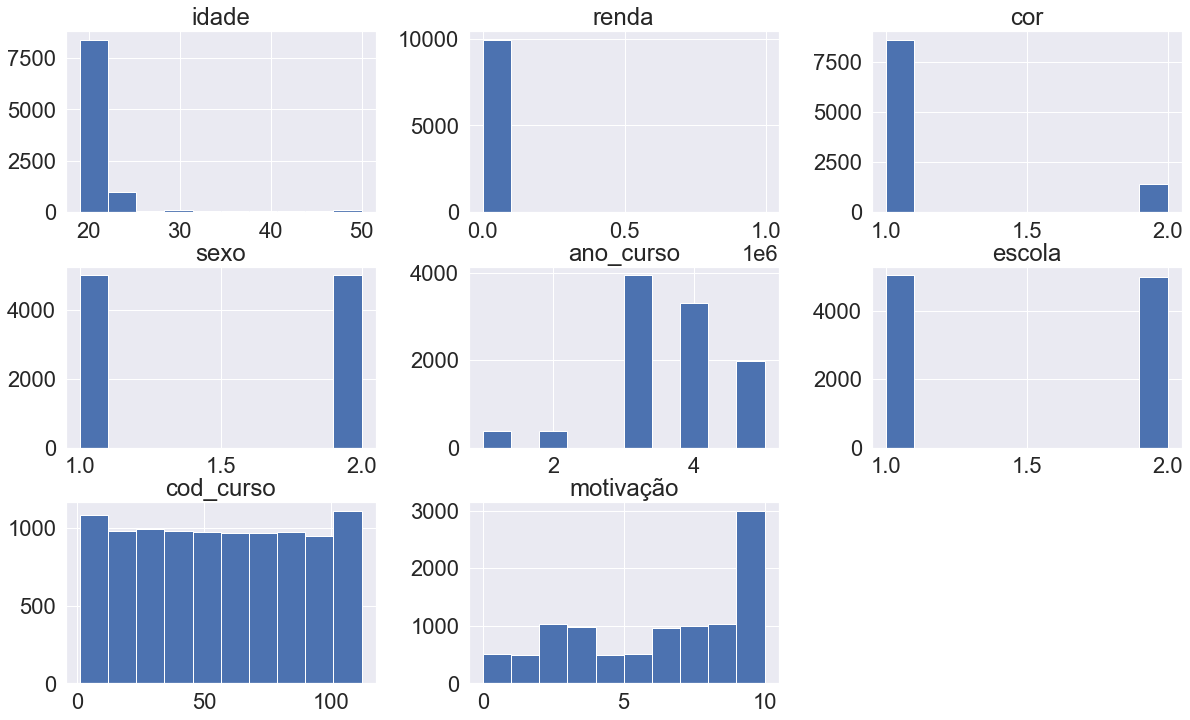

In [401]:
plt.figure()
df.hist(figsize=(20,12))
plt.show()

## 1.1. Classificando Variáveis <a class="anchor" id="section-1-1"></a>

<img src="https://i.imgur.com/YkVxGWv.png" width="75%">

<p>Vamos agora classificar as nossas features(ou colunas) para entender melhorar como conduzir nossa análise exploratória.</p>

<table align='left' style="font-size:15px">
<thead>
  <tr>
    <th>feature</th>
    <th></th>
    <th></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td style="font-weight:bold">idade</td>
    <td style="background-color:#636EFA">Quantitativa</td>
    <td  style="background-color:#f58518">Discreta</td>
  </tr>
  <tr>
    <td style="font-weight:bold">renda</td>
    <td style="background-color:#636EFA">Quantitativa</td>
    <td style="background-color:#FECB52">Contínua</td>
  </tr>
  <tr>
    <td style="font-weight:bold">cor</td>
    <td style="background-color:#EF553B">Qualitativa</td>
    <td style="background-color:#72B7B2">Nominal</td>
  </tr>
  <tr>
    <td style="font-weight:bold">sexo</td>
    <td style="background-color:#EF553B">Qualitativa</td>
    <td style="background-color:#72B7B2">Nominal</td>
  </tr>
  <tr>
    <td style="font-weight:bold">ano_curso</td>
    <td style="background-color:#EF553B">Qualitativa</td>
    <td style="background-color:#AB63FA">Ordinal</td>
  </tr>
  <tr>
    <td style="font-weight:bold">escola</td>
    <td style="background-color:#EF553B">Qualitativa</td>
    <td style="background-color:#72B7B2">Nominal</td>
  </tr>
  <tr>
    <td style="font-weight:bold">motivação</td>
    <td style="background-color:#EF553B">Qualitativa</td>
    <td style="background-color:#AB63FA">Ordinal</td>
  </tr>
</tbody>
</table>
<p style="margin-left:275px;margin-top:50px">
    Classificar nossas variáveis é importante para nos ajudar a escolher que tipo de gráfico podemos usar para visualizar a relação entre elas. Por exemplo, se quisermos plottar um gráfico de <b>dispersão</b>, precisamos de <i>pelo menos uma</i> variável <b>contínua</b>, caso contrário os pontos do gráfico ficariam todos aglutinados em alguns poucos pontos de interceção entre as variáveis.
</p>
<p style="margin-left:275px">
    Além disso, é de suma importância para escolhermos que modelo iremos usar para tentar predizer alguma delas. Exemplo: Se quisermos prever o valor da <b>motivação</b>, é preferível usarmos um método de <b>classificação</b>, afinal essa é uma feature <i>qualitativa</i> (cada nível de motivação pode ser entendido como uma classe)
    </p>

A partir desse entendimento, vamos criar agora um gráfico de dispersão para visualizar a distribuição da coluna renda no nosso dataset!

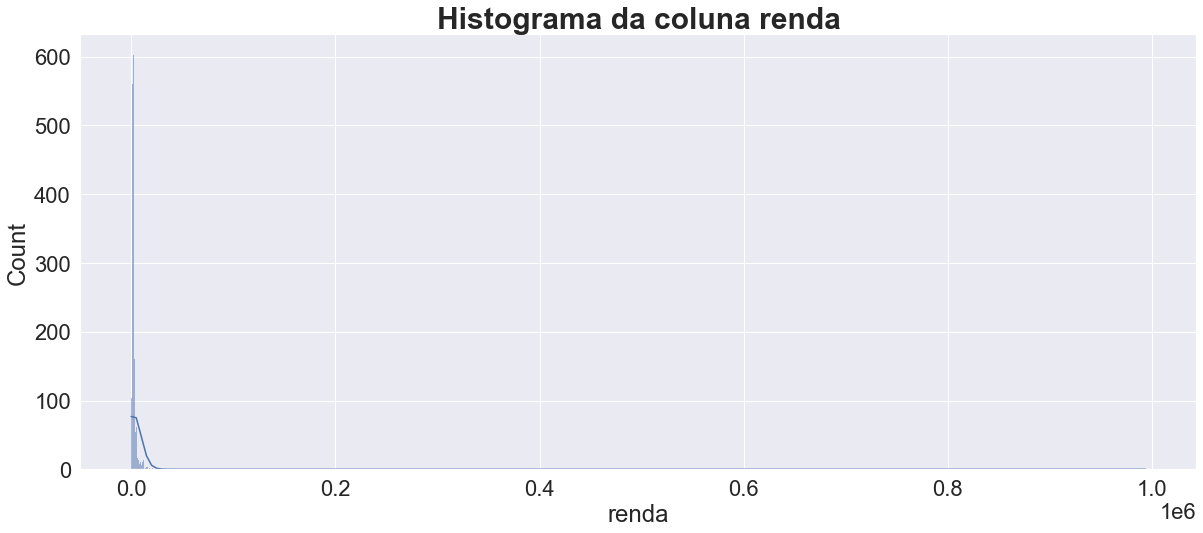

In [402]:
plt.figure(figsize=(20,8))
plt.title("Histograma da coluna renda", weight='bold').set_fontsize(30)
sns.histplot(data=df, x='renda', kde=True, log_scale=False)
plt.show()

Quando criamos um histograma da coluna renda, como a escala é linear e a **ordem de grandeza** entre os valores mínimos e máximos **é muito discrepante**, fica quase impossível de visualizarmos a distribuição, como é possível verificar na figura abaixo.

Uma forma de solucionar esse problema é alterando a escala do gráfico. A escala tradicional dos gráficos é uma **escala linear**, isso é, a cada "salto" entre um ponto e o outro do gráfico uma quantidade *constante* de valores é percorrida. Por exemplo, observe a seguinte escala: $[1,2,3,4,5]$. Nela para sabermos o novo valor basta *adicionarmos* uma constante ao valor anterior, nesse caso, o número 1 e o "salto" entre cada ponto é *fixo*, nesse caso, também 1.

Uma alternativa muito usada para a escala linear é a **escala logarítmica**. Nessa escala a cada "salto" entre um ponto e o outro do gráfico uma quantidade *variável* de valores é percorrida. Por exemplo, observe a seguinte escala: $[1,10,100,1000,10000]$. Nela para sabermos o novo valor basta *multiplicarmos* uma constante ao valor da base do logarítmo que gerou essa escala, nesse caso, o número 10 e o "salto" entre cada ponto é *variável*, nesse caso, $[9,99,999,...]$ e assim por diante.

Os principal caso de uso para se usar uma escala logarítma é quando temos uma variável que varia exponecialmente, pois essa escala também varia exponencialmente, sendo uma ótima forma de comparar pequenas diferenças entre valores de baixa ordem de grandeza e também pequenas diferenças entre valores de ordem de grandeza alta em um mesmo gráfico - porém, essa escala não é nada representativa para comparar valores de diferentes ordens de grandeza.

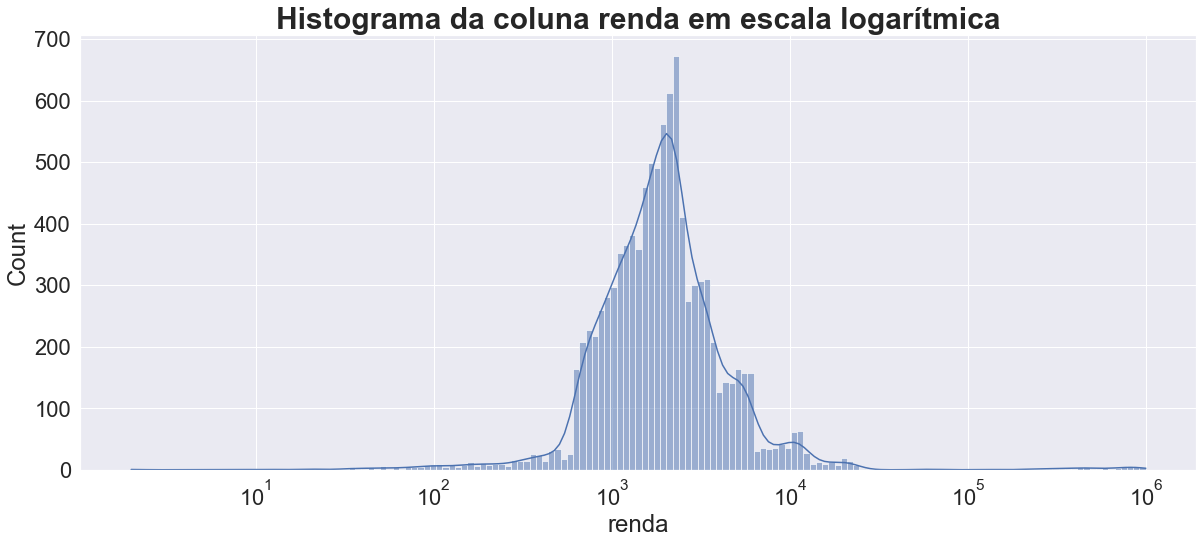

In [403]:
plt.figure(figsize=(20,8))
plt.title("Histograma da coluna renda em escala logarítmica", weight='bold').set_fontsize(30)
sns.histplot(data=df, x='renda', kde=True, log_scale=True)
plt.show()

Oba! Agora conseguimos visualizar bem melhor como é a distribuição de renda no nosso dataset 😃

In [521]:
# Criando DataFrame suporte para os próximos gráficos
temp_df = pd.DataFrame({
    'motivação': df['motivação'],
    'renda':np.log10(df['renda']).replace([np.inf, -np.inf], 0),
    'escola': df['escola'].replace({1:0, 2:1}),
    'idade': df['idade']
})

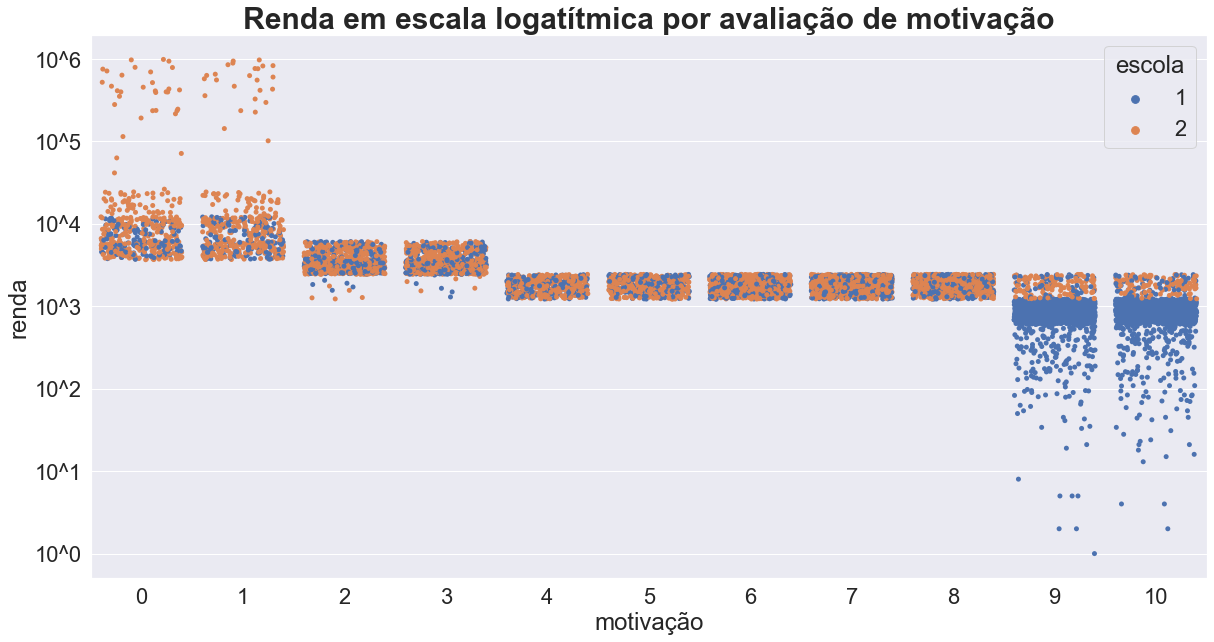

In [508]:
renda_df = pd.DataFrame({
    'motivação': df['motivação'],
    'renda':np.log10(df['renda']).replace([np.inf, -np.inf], 0),
    'escola': df['escola']
})
plt.figure(figsize=(20,10))
plt.title('Renda em escala logatítmica por avaliação de motivação', weight='bold').set_fontsize(30)
sns.stripplot(x='motivação', y='renda', data=renda_df, palette=sns.color_palette(), jitter=0.4, hue='escola')
plt.yticks([i for i in range(7)], [f'10^{i}' for i in range(7)])
plt.show()

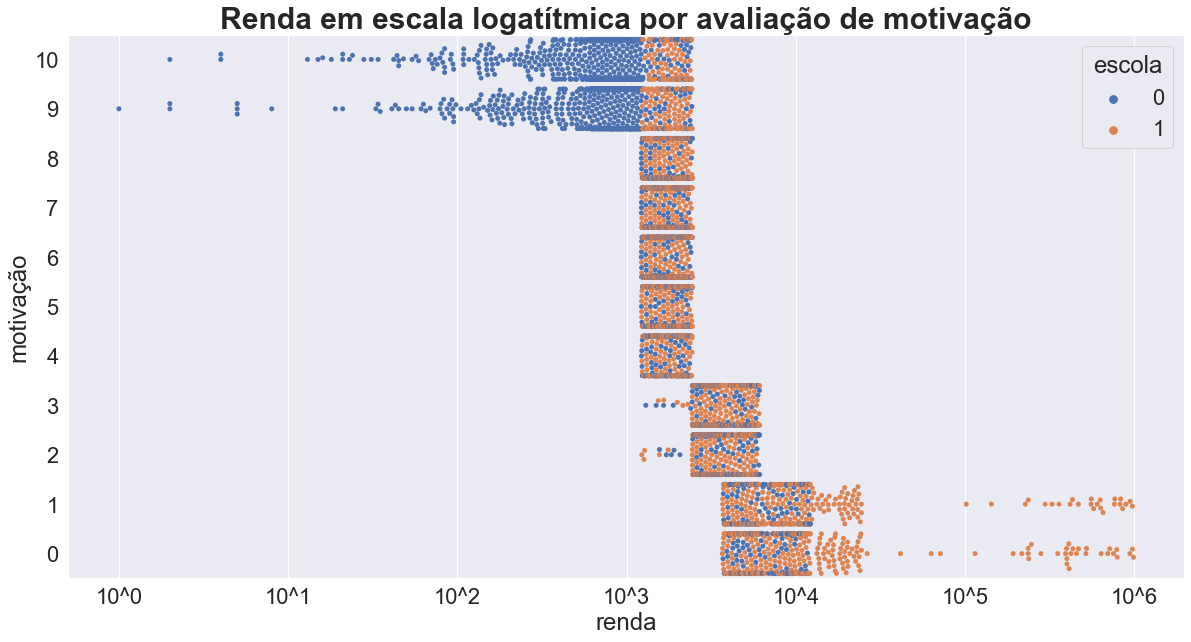

In [518]:
plt.figure(figsize=(20,10))
plt.title('Renda em escala logatítmica por avaliação de motivação', weight='bold').set_fontsize(30)
sns.swarmplot(x='renda', y='motivação', data=temp_df, palette=sns.color_palette(), hue='escola', orient='h', order=[i for i in range(10, -1, -1)])
plt.xticks([i for i in range(7)], [f'10^{i}' for i in range(7)])
plt.show()

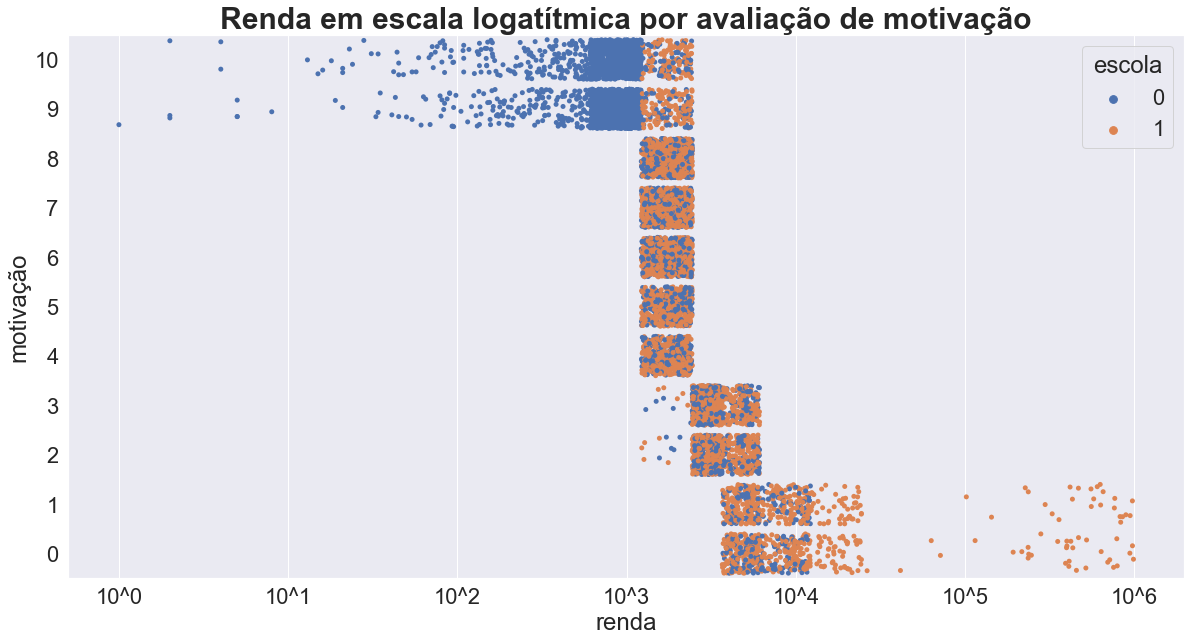

In [519]:
plt.figure(figsize=(20,10))
plt.title('Renda em escala logatítmica por avaliação de motivação', weight='bold').set_fontsize(30)
sns.stripplot(x='renda', y='motivação', data=temp_df, palette=sns.color_palette(), jitter=0.4, hue='escola', orient='h', order=[i for i in range(10, -1, -1)])
plt.xticks([i for i in range(7)], [f'10^{i}' for i in range(7)])
plt.show()

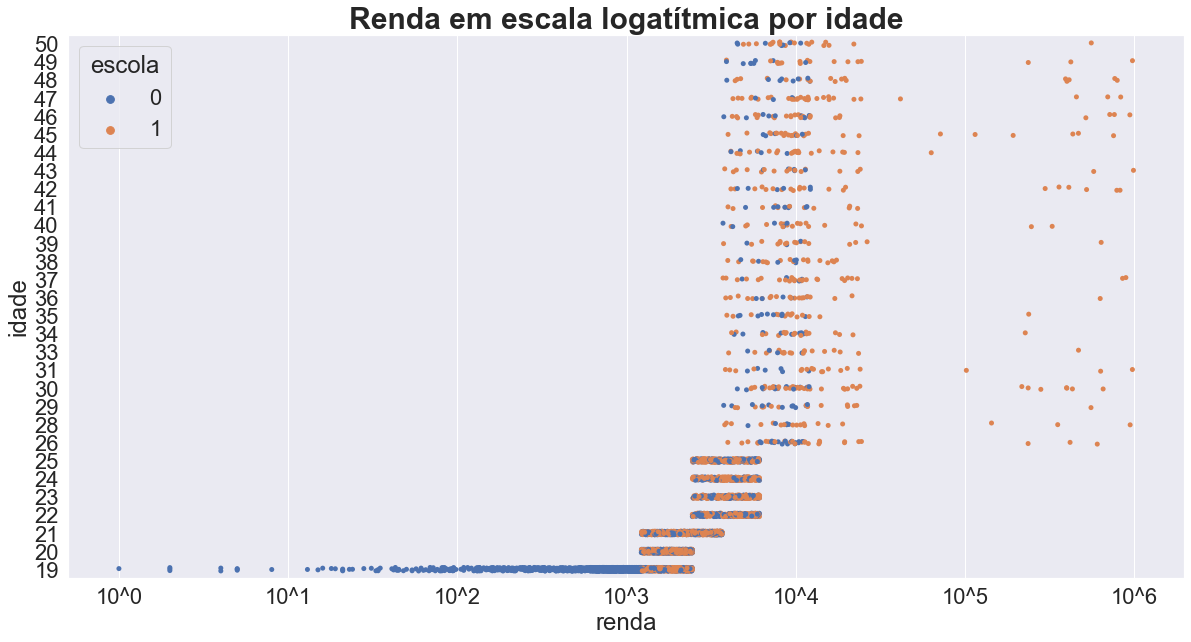

In [531]:
plt.figure(figsize=(20,10))
plt.title('Renda em escala logatítmica por idade', weight='bold').set_fontsize(30)
sns.stripplot(x='renda', y='idade', data=temp_df, palette=sns.color_palette(), hue='escola', orient='h', order=temp_df['idade'].value_counts().index.sort_values(ascending=False))
plt.xticks([i for i in range(7)], [f'10^{i}' for i in range(7)])
plt.show()

**Ideias de gráficos a fazer:**
- idade x renda: quebrar a motivação em 3 classes e mostrar gráfico de barras horizontal com a motivação pra cada idade
- motivação x idade: quebrar a motivação em 3 classes e mostrar gráfico de barras horizontal com a motivação pra cada idade

In [406]:
#df['renda'] = np.log10(df['renda'])

In [407]:
df.corr()

,idade,renda,cor,sexo,ano_curso,escola,cod_curso,motivação
idade,1.000000,0.642151,-0.002083,-0.003704,-0.107265,0.208833,0.009389,-0.619039
renda,0.642151,1.000000,0.014892,-0.007472,0.084636,0.411215,0.001962,-0.757839
cor,-0.002083,0.014892,1.000000,0.016715,0.007892,0.004150,0.012740,-0.007666
sexo,-0.003704,-0.007472,0.016715,1.000000,-0.000207,0.006800,-0.008225,0.014533
ano_curso,-0.107265,0.084636,0.007892,-0.000207,1.000000,0.214578,-0.004913,-0.232029
escola,0.208833,0.411215,0.004150,0.006800,0.214578,1.000000,-0.007188,-0.412305
cod_curso,0.009389,0.001962,0.012740,-0.008225,-0.004913,-0.007188,1.000000,0.001274
motivação,-0.619039,-0.757839,-0.007666,0.014533,-0.232029,-0.412305,0.001274,1.000000


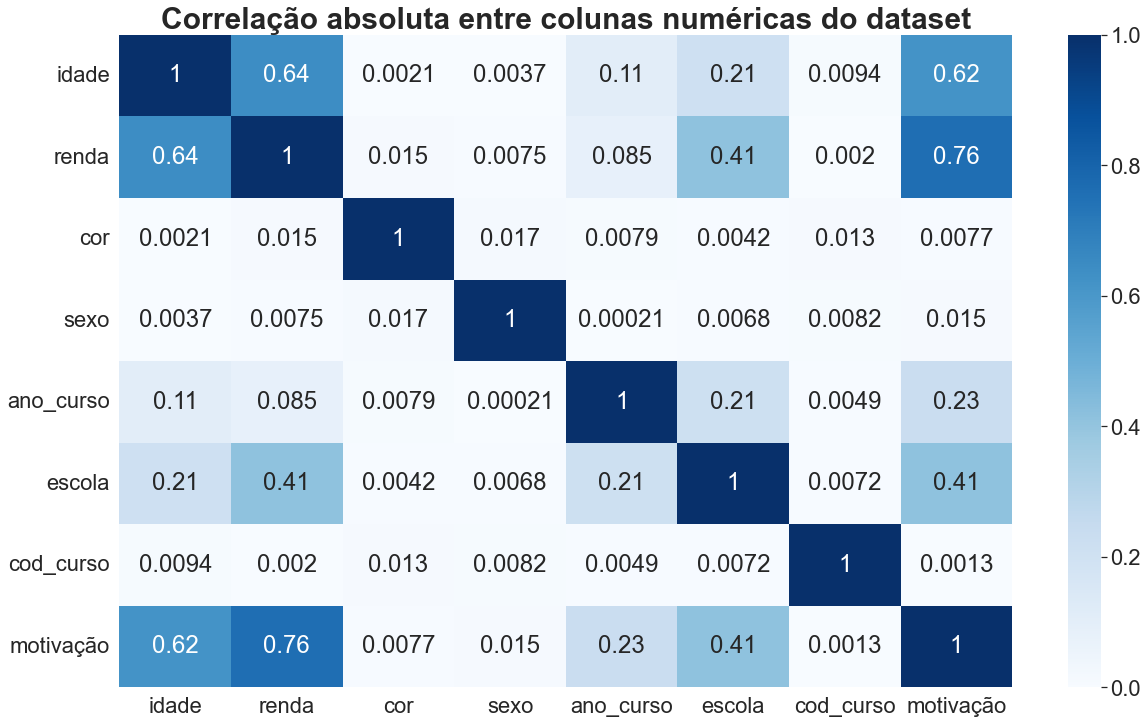

In [408]:
plt.figure(figsize=(20,12))
plt.title('Correlação absoluta entre colunas numéricas do dataset', weight='bold').set_fontsize(30)
sns.heatmap(df.corr().abs(), vmin=0, vmax=1, annot=True, cmap='Blues')
plt.show()

In [212]:
#train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

# 2. Predizendo a motivação dos alunos<a class="anchor" id="section-2"></a>
[Voltar ao topo](#section-0)

## 2.1 Selecionando Features com o auxílio do scikit-learn

Após muito pesquisar, optei por usar o *recursive feature elimination* (**RFE**) 

In [550]:
from sklearn.feature_selection import RFE

In [551]:
def column_processors(feat):
    """
    Aplica algorítmos de rescaling para cada uma das features
    """
    # Padronizar a coluna idade
    scaler = StandardScaler().fit(feat['idade'].values.reshape(-1, 1))
    feat['idade'] = scaler.transform(feat['idade'].values.reshape(-1, 1))
    
    # Padronizar a coluna renda
    feat['renda'] = np.log10(feat['renda'])
    scaler = StandardScaler().fit(feat['renda'].values.reshape(-1, 1))
    feat['renda'] = scaler.transform(feat['renda'].values.reshape(-1, 1))
    
    # Tranformar a coluna cor em binário
    enc = OneHotEncoder(drop='first').fit(feat['cor'].values.reshape(-1, 1))
    feat['cor'] = enc.transform(feat['cor'].values.reshape(-1, 1)).toarray()
    
    # Tranformar a coluna sexo em binário
    enc = OneHotEncoder(drop='first').fit(feat['sexo'].values.reshape(-1, 1))
    feat['sexo'] = enc.transform(feat['sexo'].values.reshape(-1, 1)).toarray()
    
    # Tranformar a coluna ano_curso em binário
    enc = OneHotEncoder(drop='first').fit(feat['ano_curso'].values.reshape(-1, 1))
    ano_curso_cols = enc.transform(feat['escola'].values.reshape(-1, 1)).toarray()
    feat = pd.concat(
        [feat, pd.DataFrame(ano_curso_cols, columns=[f'{i+1}ano_curso' for i in range(ano_curso_cols.shape[1])])],
        axis=1
    )
    feat.drop('ano_curso', axis=1, inplace=True)
    
    # Tranformar a coluna escola em binário
    enc = OneHotEncoder(drop='first').fit(feat['escola'].values.reshape(-1, 1))
    feat['escola'] = enc.transform(feat['escola'].values.reshape(-1, 1)).toarray()
    
    return feat

Aplicar o log antes de normalizar a coluna renda aumentou em 2% a acurácia do modelo 😮

In [552]:
# Seleciona as features numéricas do DataFrame e aplica scaling
to_select = column_processors(test_set[['idade', 'renda', 'cor', 'sexo', 'ano_curso', 'escola']])
to_select

,idade,renda,cor,sexo,escola,1ano_curso,2ano_curso,3ano_curso,4ano_curso
0,-0.268914,-0.433798,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,-0.268914,0.077598,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,-0.488435,-0.631786,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.268914,-0.263585,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,-0.268914,-0.018297,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1995,-0.268914,-0.064400,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1996,0.170129,0.605683,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1997,-0.049392,0.675138,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1998,-0.488435,-0.627579,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [553]:
# define the method
selector = RFE(estimator=LogisticRegression(), n_features_to_select=1)
# fit the model
selector = selector.fit(to_select, test_set[['motivação']])
# Report feature ranking
pd.DataFrame({'coluna': to_select.columns}, index=selector.ranking_).sort_index().rename_axis('prioridade', axis=1)

prioridade,coluna
1,idade
2,renda
3,1ano_curso
4,escola
5,sexo
6,cor
7,4ano_curso
8,3ano_curso
9,2ano_curso


In [554]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [555]:
def process_data(df):
    feat = df[['idade', 'escola']]
    target = df[['motivação']]
    
    # Padronizar a coluna idade
    scaler = StandardScaler().fit(feat['idade'].values.reshape(-1, 1))
    feat['idade'] = scaler.transform(feat['idade'].values.reshape(-1, 1))
    
    # Tranformar a coluna escola em binário
    enc = OneHotEncoder(drop='first').fit(feat['escola'].values.reshape(-1, 1))
    feat['escola'] = enc.transform(feat['escola'].values.reshape(-1, 1)).toarray()
    
    return feat, target


In [556]:
def process_data2(df):
    feat = df[['idade', 'ano_curso', 'renda']]
    target = df[['motivação']]
    
    # Padronizar a coluna idade
    scaler = StandardScaler().fit(feat['idade'].values.reshape(-1, 1))
    feat['idade'] = scaler.transform(feat['idade'].values.reshape(-1, 1))

    # Tranformar a coluna ano_curso em binário
    enc = OneHotEncoder(drop='first').fit(feat['ano_curso'].values.reshape(-1, 1))
    ano_curso_cols = enc.transform(feat['ano_curso'].values.reshape(-1, 1)).toarray()
    feat = pd.concat(
        [feat, pd.DataFrame(ano_curso_cols, columns=[f'{i+1}ano_curso' for i in range(ano_curso_cols.shape[1])])],
        axis=1
    )
    feat.drop('ano_curso', axis=1, inplace=True)
    
    # Como renda aproxima-se de uma distribuição exponencial, vamos tirar o log10 dela
    renda = pd.Series(np.log10(feat['renda'])).replace([np.inf, -np.inf], 0)
    feat['renda'] = renda
    # Padronizar a coluna renda
    scaler = StandardScaler().fit(feat['renda'].values.reshape(-1, 1))
    feat['renda'] = scaler.transform(feat['renda'].values.reshape(-1, 1))
    
    return feat[['idade', '1ano_curso', 'renda']], target


## 3. Treinando modelo de Regressão Logística

In [573]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [558]:
train_set = pd.read_csv('train_set.tsv', sep='\t')
X_train, Y_train = process_data2(train_set)

In [559]:
model = LogisticRegression().fit(X_train, Y_train.iloc[:, 0].values)

In [560]:
test_set = pd.read_csv('test_set.tsv', sep='\t')
X_test, Y_test = process_data2(test_set)

In [561]:
Y_pred = model.predict(X_test)

In [562]:
acuracia = accuracy_score(Y_test, Y_pred)
print(f'accuracy = {acuracia}')

accuracy = 0.3925


In [563]:
model.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [564]:
for i in range(len(model.coef_)):
    print(f'For label {model.classes_[i]} feature weights = {model.coef_[i].round(2)}')

For label 0 feature weights = [8.47 0.74 9.1 ]
For label 1 feature weights = [8.52 0.79 9.09]
For label 2 feature weights = [6.88 0.23 5.56]
For label 3 feature weights = [6.76 0.36 5.73]
For label 4 feature weights = [ 6.03 -0.82 -3.42]
For label 5 feature weights = [ 6.21 -0.82 -3.63]
For label 6 feature weights = [-4.01 -0.15 -2.57]
For label 7 feature weights = [-3.91 -0.14 -2.79]
For label 8 feature weights = [-4.05 -0.15 -2.61]
For label 9 feature weights = [-15.51  -0.03  -7.22]
For label 10 feature weights = [-15.39  -0.03  -7.23]


In [576]:
confusion_matrix(Y_test, Y_pred)

array([[  7,  55,   5,  19,   0,   0,   0,   0,   0,   0,   0],
       [ 12,  52,   7,  18,   0,   0,   0,   0,   0,   0,   0],
       [  4,   3, 101,  99,   0,   0,   0,   0,   0,   0,   0],
       [ 14,   4,  92,  96,   0,   3,   0,   0,   0,   0,   0],
       [  0,   0,  10,   0,  12,  34,   0,   0,  42,   0,   0],
       [  0,   0,   9,   0,  16,  31,   0,   0,  57,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 160,  13,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 202,  16,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 186,  19,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  16, 295,   2],
       [  0,   0,   0,   0,   0,   0,   0,   0,  21, 263,   5]],
      dtype=int64)

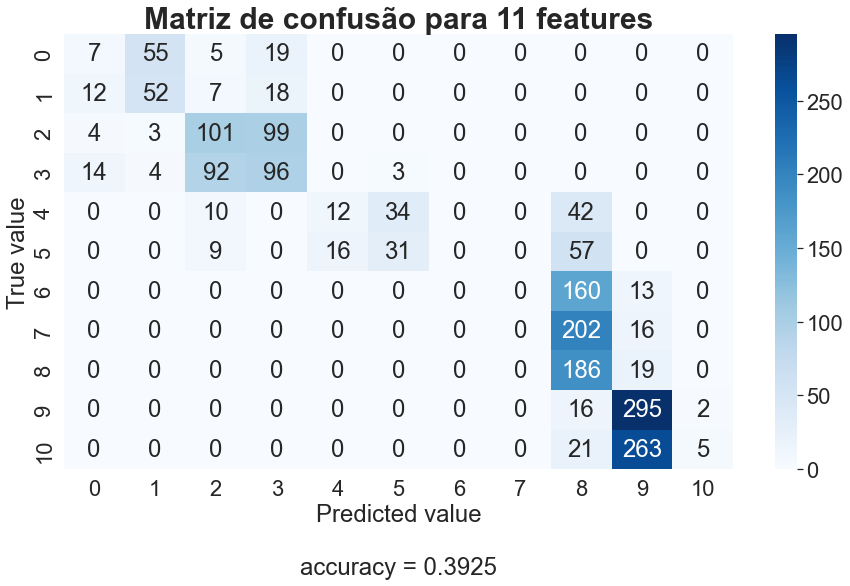

In [601]:
plt.figure(figsize=(15,8))
plt.title('Matriz de confusão para 11 features', weight='bold').set_fontsize(30)
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='', cmap='Blues')
plt.xlabel(f'Predicted value\n\naccuracy = {acuracia}')
plt.ylabel('True value')
plt.show()

## 3.2 Simplificando o nosso output

<img src='https://i.imgur.com/0MZZ8gj.jpg'>

Um dos indicadores mais famosos do mercado é o NPS (Net Promotor Score). Baseado em uma escala de 1 a 10 ele classifica clientes/funcionários como promotores, neutros ou detratores de uma empresa. Podemos utilizar a mesma lógica para **diminuir o número de classes** que o nosso output irá apresentar, dessa forma **simplificando nosso modelo e aumentando a sua acurácia.**

In [540]:
def process_data_simplified(df):
    feat = df[['idade', 'ano_curso', 'renda']]
    target = df[['motivação']]
    
    ##### Tratando features
    
    # Padronizar a coluna idade
    scaler = StandardScaler().fit(feat['idade'].values.reshape(-1, 1))
    feat['idade'] = scaler.transform(feat['idade'].values.reshape(-1, 1))

    # Tranformar a coluna ano_curso em binário
    enc = OneHotEncoder(drop='first').fit(feat['ano_curso'].values.reshape(-1, 1))
    ano_curso_cols = enc.transform(feat['ano_curso'].values.reshape(-1, 1)).toarray()
    feat = pd.concat(
        [feat, pd.DataFrame(ano_curso_cols, columns=[f'{i+1}ano_curso' for i in range(ano_curso_cols.shape[1])])],
        axis=1
    )
    feat.drop('ano_curso', axis=1, inplace=True)
    
    # Como renda aproxima-se de uma distribuição exponencial, vamos tirar o log10 dela
    renda = pd.Series(np.log10(feat['renda'])).replace([np.inf, -np.inf], 0)
    feat['renda'] = renda
    # Padronizar a coluna renda
    scaler = StandardScaler().fit(feat['renda'].values.reshape(-1, 1))
    feat['renda'] = scaler.transform(feat['renda'].values.reshape(-1, 1))
    
    ##### Tratando target
    
    conditions = [
        target <= 6,
        (target >= 7) & (target <= 8),
        target >= 8
    ]

    choices = [
        'desmotivados',
        'neutros',
        'motivados'
    ]

    target = np.select(conditions, choices)
    
    
    return feat[['idade', '1ano_curso', 'renda']], target


In [541]:
train_set = pd.read_csv('train_set.tsv', sep='\t')
X_train, Y_train = process_data_simplified(train_set)

In [542]:
model = LogisticRegression().fit(X_train, Y_train)

In [543]:
test_set = pd.read_csv('test_set.tsv', sep='\t')
X_test, Y_test = process_data_simplified(test_set)

In [544]:
Y_pred = model.predict(X_test)

In [545]:
acuracia = accuracy_score(Y_test, Y_pred)
print(f'accuracy = {acuracia}')

accuracy = 0.7775


In [547]:
model.classes_

array(['desmotivados', 'motivados', 'neutros'], dtype='<U12')

In [548]:
for i in range(len(model.coef_)):
    print(f'For label {model.classes_[i]} feature weights = {model.coef_[i].round(2)}')

For label desmotivados feature weights = [11.35  0.3   2.2 ]
For label motivados feature weights = [-13.72  -0.    -3.38]
For label neutros feature weights = [ 2.37 -0.3   1.18]


# 3. Predizendo renda dos alunos<a class="anchor" id="section-3"></a>
[Voltar ao topo](#section-0)

## 3.1. Selecionando Features com o auxílio do scikit-learn<a class="anchor" id="section-3-1"></a>

## 3.2. Regressão Linear (1 feature)<a class="anchor" id="section-3-2"></a>

## 3.3. Regressão Linear multi-feature<a class="anchor" id="section-3-3"></a>